In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweet-sentiment-extraction/train.csv
/kaggle/input/tweet-sentiment-extraction/test.csv
/kaggle/input/tweet-sentiment-extraction/sample_submission.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/train.csv')
train_data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
test_data = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/test.csv')
test_data.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [4]:
dd = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/sample_submission.csv')
dd.head()

,textID,selected_text
0,f87dea47db,NaN
1,96d74cb729,NaN
2,eee518ae67,NaN
3,01082688c6,NaN
4,33987a8ee5,NaN


In [5]:
train_data.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [7]:
train_data.dropna(inplace= True)
train_data.isna().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [8]:
# adding text length and wordcounts using lambda functions
train_data['length'] = train_data['text'].apply(lambda x : len(str(x)))
train_data['wordcount'] = train_data['text'].apply(lambda x : len(str(x).split()))
train_data.head()

,textID,text,selected_text,sentiment,length,wordcount
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36,7
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46,10
2,088c60f138,my boss is bullying me...,bullying me,negative,25,5
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31,5
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75,14


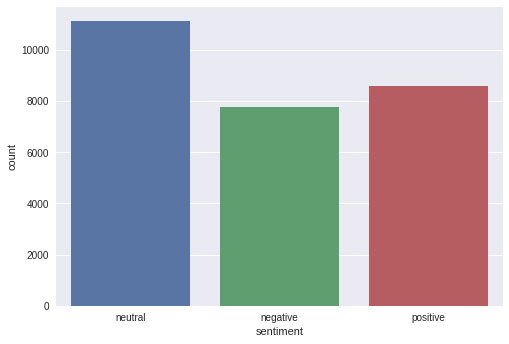

In [9]:
# sentiments
sns.countplot(x = 'sentiment', data = train_data)
plt.show()

---------positive-------------


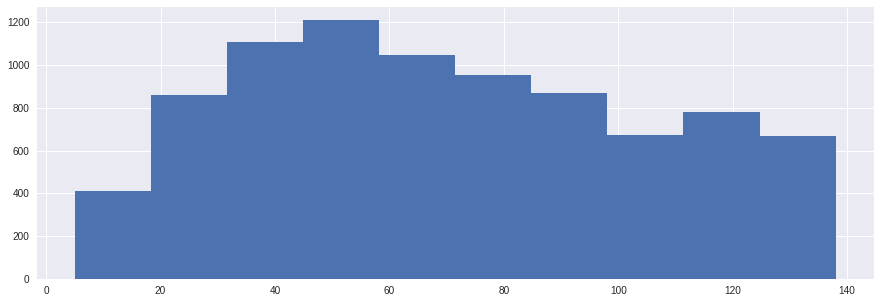

---------negative-------------


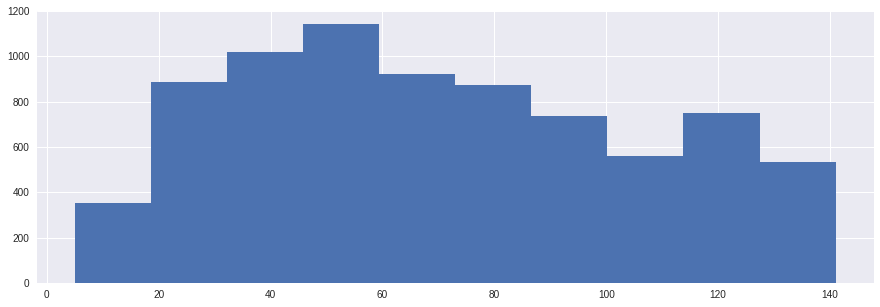

---------neutral-------------


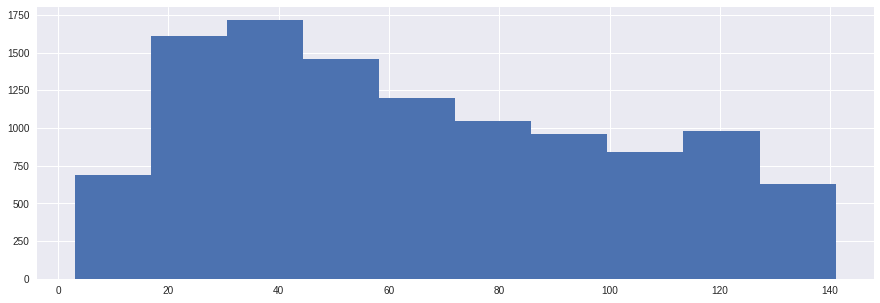

In [10]:
# sentiment word length distribution
senti = ['positive', 'negative', 'neutral']

for i in senti:
    print('---------'+ i +'-------------')
    train_data[train_data['sentiment'] == i]['length'].hist(figsize = (15,5))
    plt.show()

---------positive-------------


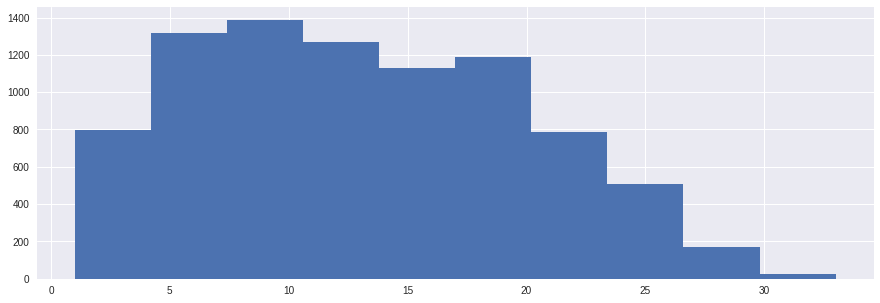

---------negative-------------


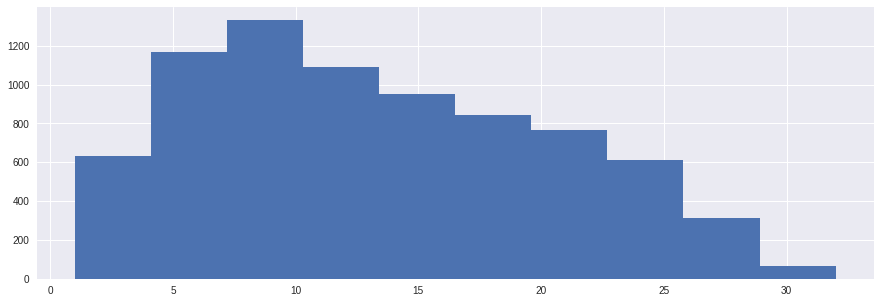

---------neutral-------------


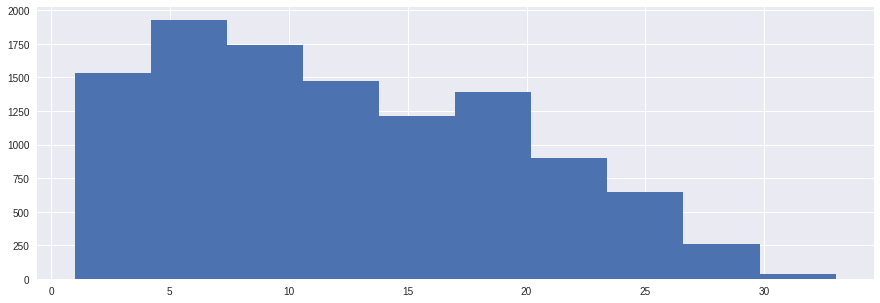

In [11]:
# sentiment word count distribution
senti = ['positive', 'negative', 'neutral']

for i in senti:
    print('---------'+ i +'-------------')
    train_data[train_data['sentiment'] == i]['wordcount'].hist(figsize = (15,5))
    plt.show()

### Data Cleaning

In [12]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Find emoji patterns
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# Basic function to clean the text
def clean_text(text):
    text = str(text)
    # Remove emojis
    text = emoji_pattern.sub(r'', text)
    # Remove identifications
    text = re.sub(r'@\w+', '', text)
    # Remove links
    text = re.sub(r'http.?://[^/s]+[/s]?', '', text)
    return text.strip().lower()

train_data['text'] = train_data['text'].apply(lambda x:clean_text(x))

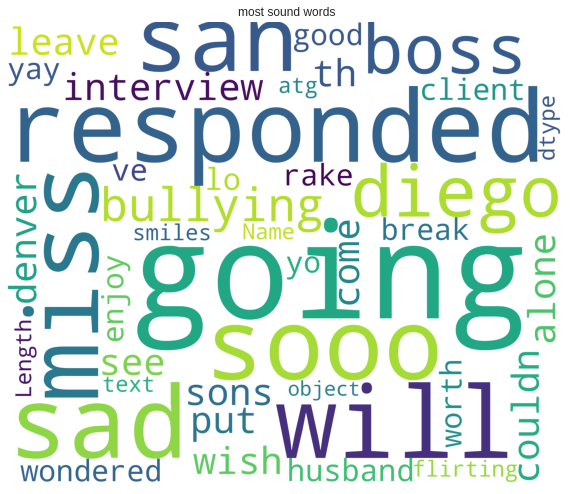

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white', width=3000, height=2500).generate(str(train_data['text']))
plt.figure(figsize=(10,10))
plt.title('most sound words')
plt.imshow(wc)
plt.axis('off')
plt.show()

positive words : 8582


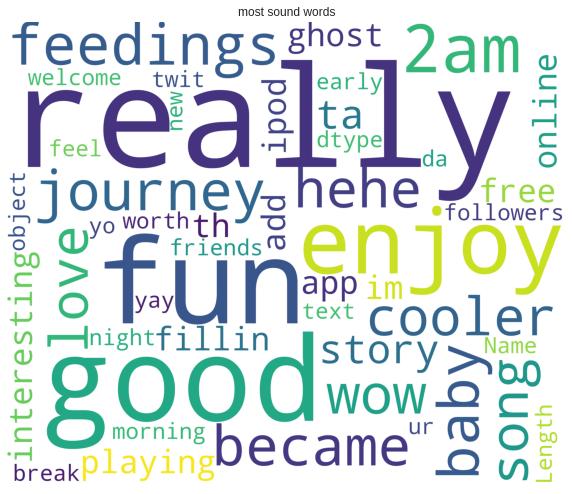

In [31]:
print('positive words : {}'.format(len(train_data[train_data['sentiment'] == 'positive'])))
wc = WordCloud(background_color='white', width=3000, height=2500).generate(str(train_data[train_data['sentiment'] == 'positive']['text']))
plt.figure(figsize=(10,10))
plt.title('most sound words')
plt.imshow(wc)
plt.axis('off')
plt.show()


negative words : 7781


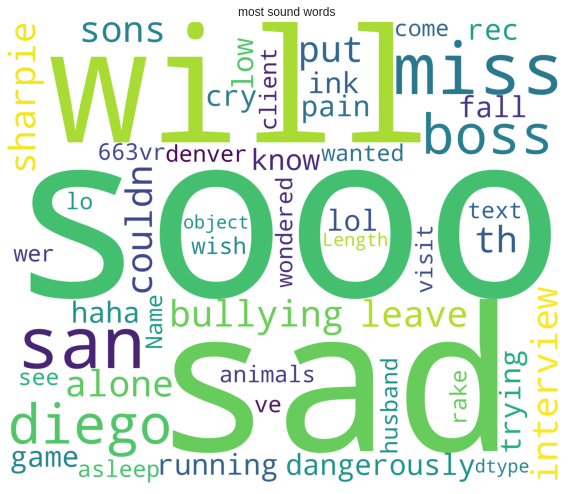

In [32]:
print('negative words : {}'.format(len(train_data[train_data['sentiment'] == 'negative'])))
wc = WordCloud(background_color='white', width=3000, height=2500).generate(str(train_data[train_data['sentiment'] == 'negative']['text']))
plt.figure(figsize=(10,10))
plt.title('most sound words')
plt.imshow(wc)
plt.axis('off')
plt.show()

neutral words : 11117


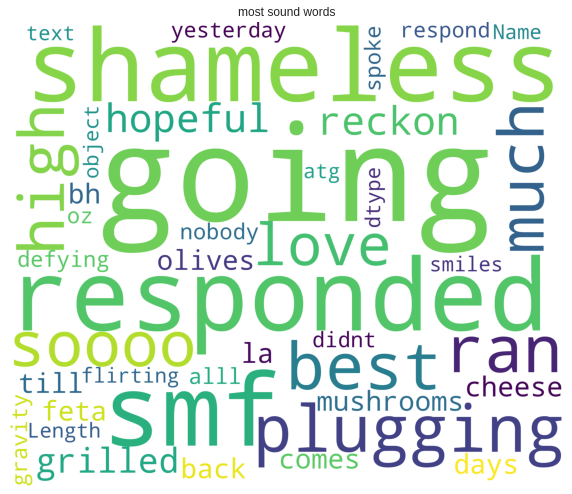

In [33]:
print('neutral words : {}'.format(len(train_data[train_data['sentiment'] == 'neutral'])))
wc = WordCloud(background_color='white', width=3000, height=2500).generate(str(train_data[train_data['sentiment'] == 'neutral']['text']))
plt.figure(figsize=(10,10))
plt.title('most sound words')
plt.imshow(wc)
plt.axis('off')
plt.show()